<a href="https://colab.research.google.com/github/parthhasstartedcoding/Product-Management/blob/main/Sentiment_Analysis_Financial_Headlines_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Sentiment Analysis of Financial News Headlines

This project performs sentiment analysis on financial news headlines, aiming to classify them as positive, neutral, or negative.
This analysis helps understand the sentiment around financial news from the perspective of retail investors.

### Objective
The objective is to build a sentiment classification tool that can process and classify financial news headlines, highlighting positive,
neutral, and negative sentiments.

### Dataset
The dataset contains labeled financial news headlines for three sentiments: positive, neutral, and negative.

---



## Methodology

1. **Data Cleaning and Preprocessing**:
    - Removed punctuation, stopwords, and converted text to lowercase for consistent processing.
2. **Exploratory Data Analysis (EDA)**:
    - Visualized the sentiment distribution and analyzed common words for each sentiment to gain insights into the language patterns.
3. **NLP Vectorization**:
    - Used TF-IDF vectorization to convert text into numerical form, including n-grams to capture context better.
4. **Model Selection and Training**:
    - Trained and compared Logistic Regression and SVM models. Fine-tuned feature selection by adjusting n-grams and filtering to improve model accuracy for distinguishing sentiments.
5. **Evaluation and Analysis**:
    - Assessed models based on accuracy, precision, recall, and confusion matrix to understand model performance and identify strengths in predicting each sentiment.

---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import string
from collections import Counter
from wordcloud import WordCloud

# Load the data
file_path = 'all-data.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Rename columns
data.columns = ['sentiment', 'headline']

# Drop duplicates
data.drop_duplicates(inplace=True)

# Display basic info
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4839 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4839 non-null   object
 1   headline   4839 non-null   object
dtypes: object(2)
memory usage: 113.4+ KB


(None,
   sentiment                                           headline
 0   neutral  Technopolis plans to develop in stages an area...
 1  negative  The international electronic industry company ...
 2  positive  With the new production plant the company woul...
 3  positive  According to the company 's updated strategy f...
 4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...)

In [ ]:
# Define stopwords manually due to download constraints
stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers",
    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does",
    "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until",
    "while", "of", "at", "by", "for", "with", "about", "against", "between", "into",
    "through", "during", "before", "after", "above", "below", "to", "from", "up", "down",
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here",
    "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more",
    "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
])

# Text Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply preprocessing
data['processed_headline'] = data['headline'].apply(preprocess_text)
data.head()

,sentiment,headline,processed_headline
0,neutral,Technopolis plans to develop in stages an area...,technopolis plans develop stages area less 100...
1,negative,The international electronic industry company ...,international electronic industry company elco...
2,positive,With the new production plant the company woul...,new production plant company would increase ca...
3,positive,According to the company 's updated strategy f...,according company updated strategy years 20092...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing aspocomp growth aspocomp aggressivel...


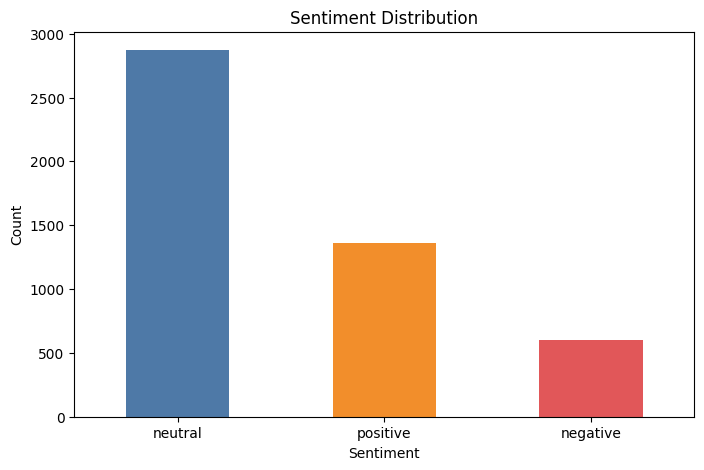

In [ ]:
# Visualize Sentiment Distribution
plt.figure(figsize=(8, 5))
data['sentiment'].value_counts().plot(kind='bar', color=['#4e79a7', '#f28e2b', '#e15759'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

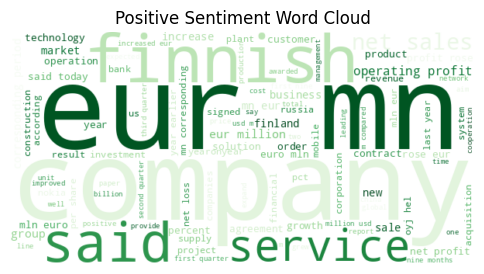

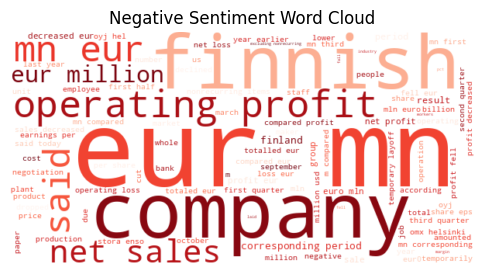

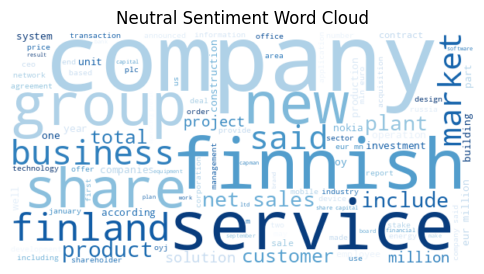

In [ ]:
# Wordclouds for each sentiment with adjusted figure size
def plot_wordcloud(sentiment, color):
    text = " ".join(data[data['sentiment'] == sentiment]['processed_headline'])
    wordcloud = WordCloud(width=600, height=300, background_color='white', colormap=color, max_words=100).generate(text)
    plt.figure(figsize=(6, 4))  # Adjusted figure size
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f"{sentiment.capitalize()} Sentiment Word Cloud")
    plt.show()

# Generate word clouds for each sentiment
plot_wordcloud('positive', 'Greens')
plot_wordcloud('negative', 'Reds')
plot_wordcloud('neutral', 'Blues')


In [ ]:
# Train-test split
X = data['processed_headline']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorizer with n-grams and feature limits for fine-tuning
tfidf_tuned = TfidfVectorizer(ngram_range=(1, 2), min_df=5, max_features=3000)
X_train_tfidf_tuned = tfidf_tuned.fit_transform(X_train)
X_test_tfidf_tuned = tfidf_tuned.transform(X_test)

# SVM Model with tuned data
svm_model_tuned = SVC(kernel='linear', random_state=42)
svm_model_tuned.fit(X_train_tfidf_tuned, y_train)

# Predictions and Evaluation
y_pred_svm_tuned = svm_model_tuned.predict(X_test_tfidf_tuned)
accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
report_svm_tuned = classification_report(y_test, y_pred_svm_tuned)

# Print results
print(f"Tuned SVM Model Accuracy: {accuracy_svm_tuned:.2%}")
print("Tuned SVM Classification Report:\n", report_svm_tuned)


Tuned SVM Model Accuracy: 72.62%
Tuned SVM Classification Report:
               precision    recall  f1-score   support

    negative       0.68      0.42      0.52       120
     neutral       0.74      0.90      0.82       571
    positive       0.68      0.49      0.57       277

    accuracy                           0.73       968
   macro avg       0.70      0.60      0.64       968
weighted avg       0.72      0.73      0.71       968



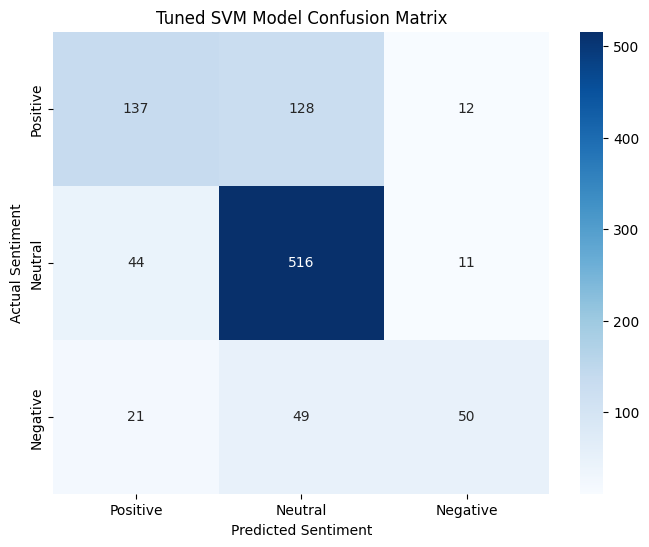

In [ ]:
# Confusion Matrix for Tuned Model
conf_matrix_svm_tuned = confusion_matrix(y_test, y_pred_svm_tuned, labels=['positive', 'neutral', 'negative'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'],
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.xlabel("Predicted Sentiment")
plt.ylabel("Actual Sentiment")
plt.title("Tuned SVM Model Confusion Matrix")
plt.show()


## Conclusion

- The SVM model achieved an accuracy of 72.62%, with improved recall for positive sentiments after tuning feature selection.
- Analysis revealed that certain terms shared between positive and neutral sentiments led to neutral classifications.
- Fine-tuning TF-IDF vectorization using bigrams helped differentiate these sentiments by capturing context, though some overlap persists.
- Further improvements could include exploring advanced NLP models like BERT for more nuanced sentiment detection.

This project demonstrates the value of feature selection and contextual analysis in financial sentiment classification.
